### Starting source 
Copyright (c) 2015 - 2017 [Sebastian Raschka](sebastianraschka.com)

https://github.com/rasbt/python-machine-learning-book

[MIT License](https://github.com/rasbt/python-machine-learning-book/blob/master/LICENSE.txt)

# Decision tree learning

Decision tree classifiers are attractive models if we care about **interpretability**.

Like the name decision tree suggests, we can think of this model as <br>
``breaking down our data by making decisions based on asking a series of questions``.

#### The Basic Algorithm

* Start at the root node as parent node
* **Split** the parent node at the **feature** $x_i$ to **minimize** the sum of the **child** node **impurities** (maximize information gain)
* Assign training samples to new child nodes
  * Stop if leave nodes are pure or early stopping criteria is satisfied, 
  * else repeat steps 1 and 2 for each new child node

#### Stopping Rules

* The leaf nodes are **pure**
* A maximal node **depth** is reached
* Splitting a node does not lead to an **information gain**

Let's consider the following **example** where we use a decision tree to decide upon an activity on a particular day:
<br>
<br>
<img src="figures/03_15.png" width="50%">

### Decision tree based on real number
**Based on the features** in our training set, the ``decision tree model learns a series of questions to infer the class labels`` of the samples. 

Although the preceding figure illustrated the concept of a decision tree based on **categorical variables**,  
the same concept applies if our features are **real numbers** like in the Iris dataset. 

For example, we could simply define a cut-off value along the sepal width feature axis and ask a binary question "``sepal width ≥ 2.8 cm?``"

### Overfitting and Pruning
Using the decision algorithm, we start at the **tree root**   
and split the data on the feature that results in the **largest information gain** (IG), which will be explained in more detail in the following section. 

In an **iterative process**,   
we can then repeat this splitting procedure at each child node **until the leaves are pure**. 

This means that the samples at each node all **belong to the same class**. 

In practice, this can result in a **very deep tree** with many nodes, which can easily lead to <span style="color:red">overfitting</span>. 

Thus, we typically want to **prune the tree** by setting a limit for the maximal depth of the tree.

## Maximizing information gain

<img align="left" style="padding-right:10px;"  src="figures/decision-tree.svg" width="40%"> In order to **split** the nodes at the **most informative features**, we need to define an
**objective function** that we want to optimize via the tree learning algorithm. 

Here, our objective function is to **maximize the information gain** at each split, which we
define as follows:


$$IG(D_p, f) = I( D_p ) − \sum_{j=1}^m{\frac{N_j}{N_p}I(D_j)}$$



Here, $f$ is the **feature** to perform the split, $D_p$ and $D_j$ are the **dataset** of the parent and $j^{th}$ child node, $I$ is our **impurity measure**, $N_p$ is the total number of **samples** at the parent node, and $N_j$ is the number of **samples** in the $j^{th}$ child node. 

As we can see, the information gain is simply the difference between the impurity of the parent node and the sum of the child node impurities — ``the lower the impurity of the child nodes, the larger the information gain``.

### Binary decision tree
However, for simplicity and to reduce the combinatorial search space, most libraries (including scikit-learn) implement **binary decision trees**. <br>
This means that each parent node is split into two child nodes, $D_{left}$ and $D_{right}$ :

$$IG(D_p , a) = I(D_p) − \frac{N_{left}}{N_p} I(D_{left}) − \frac{N_{right}}{N_p} I(D_{right})$$


## Impurity measures
Now, the <span style="color:red">three</span> **impurity measures** or **splitting criteria** that are commonly used in binary decision trees are 
- **Gini index** ( $I_G$ ), 
- **entropy** ( $I_H$ ), 
- and the **classification error** ( $I_E$ ). 

#### Entropy

Let's start with the definition of ``entropy`` for all non-empty classes ( $p( i~|~t ) ≠ 0$ ):

$$ I_H ( t ) = −\sum_{i=1}^c{ p ( i ~|~ t )~\log_2 p ( i ~|~ t )} $$

Here, $p ( i~ |~ t )$ is the proportion of the samples that belongs to class $i$ for a particular
node t. 

The **entropy** is therefore **0** if ``all samples at a node belong to the same class``, and the entropy is **maximal** if we have a ``uniform class distribution``. 

#### Example
in a binary class setting, the entropy is 0 if $p ( i = 1~|~ t ) = 1$ or $p ( i = 0~ |~ t ) = 0$ .

If the classes are distributed uniformly with $p ( i = 1~|~ t ) = 0.5$ and $p ( i = 0 ~|~ t ) = 0.5$ , the entropy is 1. 

Therefore, we can say that the entropy criterion attempts to maximize the mutual information in the tree.

#### Gini index

Intuitively, the ``Gini index`` can be understood as a criterion to minimize the probability of misclassification:

$$I_G ( t ) = \sum_{i=1}^c{ p ( i~|~t ) ( − p ( i~|~t ) )} = 1 − \sum_{i=1}^c{ p ( i~|~t )^2}$$

Similar to entropy, the Gini index is **maximal** if the classes are perfectly mixed, for example, in a binary class setting ( c = 2 ):

$$1 − \sum_{i=1}^c{ 0.5^2} = 0.5$$

However, in practice both the Gini index and entropy typically yield very similar results and it is often not worth spending much time on evaluating trees using different impurity criteria rather than experimenting with different pruning cut-offs.

#### Classification error

Another impurity measure is the classification error:

$$I_E = 1 − \max \{ p ( i~|~t )\}$$

This is a **useful** criterion for **pruning** but ``not recommended for growing a decision tree``, since it is less sensitive to changes in the class probabilities of the nodes.


#### Example
We can illustrate this by looking at the two possible splitting scenarios shown in the following figure:

<img src="./figures/AB-decision-tree.png" width="40%">

We start with a dataset $D_p$ at the parent node that consists of $N_p=80$ divided in 40 samples from class 1 and 40 samples from class 2 that we split into two datasets $D_{left}$ and $D_{right}$, respectively. 

The **information gain** using the **classification error** as a splitting criterion would be the same ( $IG_E = 0.25$ ) in both scenario A and B:

$$I_E ( D_p ) = 1 − 0.5 = 0.5$$

$$A : I_E ( D_{left} ) = 1 − \frac{3}{4} = 0.25$$

$$A : I_E ( D_{right} ) = 1 − \frac{3}{4} = 0.25$$

$$A : IG_E = 0.5 − \frac{4}{8} 0.25 − \frac{4}{8} 0.25 = 0.25$$

$$B : I_E ( D_{left} ) = 1 − \frac{4}{6} = \frac{1}{3}$$

$$B : I_E ( D_{right} ) = 1 − 1 = 0$$

$$B : IG_E = 0.5 − \frac{6}{8}×\frac{1}{3} − 0 = 0.25$$

However, the **Gini index** would favor the split in scenario B ( $IG_G = 0.16$ ) over scenario
A ( $IG_G = 0.125$ ) , which is indeed more pure:

$$I_G ( D_p ) = 1 − \left( 0.5^2 + 0.5^2 \right) = 0.5$$

$$A : I_G ( D_{left} ) = 1 − \left(\left(\frac{3}{4}\right)^2 + \left(\frac{1}{4}\right)^2\right) = \frac{3}{8} = 0.375$$

$$A : I_G ( D_{right} ) = 1 − \left(\left(\frac{1}{4}\right)^2 + \left(\frac{3}{4}\right)^2\right) = \frac{3}{8} = 0.375$$

$$A : I_G = 0.5 − \frac{4}{8} 0.375 − \frac{4}{8} 0.375 = 0.125$$

$$B : I_G ( D_{left} ) = 1 − \left(\left(\frac{2}{6}\right)^2 + \left(\frac{4}{6}\right)^2\right) = \frac{4}{9} = 0.4$$

$$B : I_G ( D_{right} ) = 1 − (1^2 + 0^2 ) = 0$$

$$B : I_G = 0.5 − \frac{6}{8} 0.4 − 0 = 0.16$$


Similarly, the **entropy** criterion would favor scenario B ( $IG_H = 0.19$ ) over scenario A ( $IG_H = 0.31$ ) ...
<br>
<br>

#### Plot the impurity indices
For a more visual comparison of the three different impurity criteria that we discussed previously, let's **plot** the **impurity indices** for the probability range $[0, 1]$ for class 1. 

Note that we will also add in a scaled version of the entropy (entropy/2) to observe that the Gini index is an intermediate measure between entropy and the classification error. The code is as follows:


In [1]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

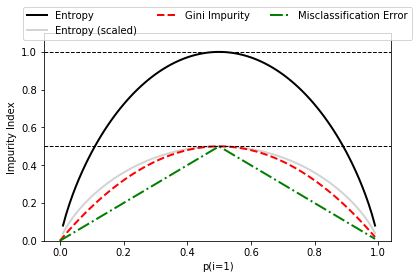

In [2]:
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()
#plt.savefig('./figures/impurity.png', dpi=300, bbox_inches='tight')
plt.show()

## Building a decision tree

Building a decision tree Decision trees can **build complex decision boundaries** by dividing the feature
space into rectangles. 

However, we have to **be careful** since the **deeper** the decision tree, the more **complex** the decision boundary becomes, which can easily result in overfitting. 

Using ``scikit-learn``, we will now train a decision tree with a **maximum depth** of 3 using **entropy** as a criterion for **impurity**. 

Although feature scaling may be desired for visualization purposes, note that feature scaling is not a requirement for decision tree algorithms. 

The code is as follows:


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# LOAD DATA
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

# SPLIT THE DATASET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<div class="alert alert-success">

## Practice 
* What is the size of data? 
* What is the size of X_train, X_test, y_train, y_test? 
* Check that number of samples contained in X and in y are equals

</div>

In [ ]:
# write your code here





'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


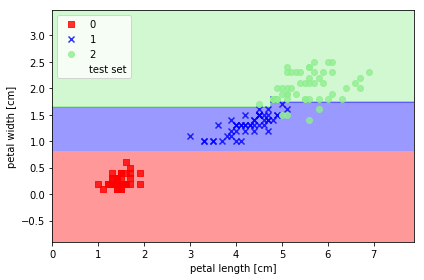

In [27]:
from sklearn.tree import DecisionTreeClassifier
from plot_decision_regions import plot_decision_regions

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/decision_tree_decision.png', dpi=300)
plt.show()

<div class="alert alert-success">
    
## Practice 
* Compare current DecisionTreeClassifier with a new version configured with `Gini Impurity`
* Compare current DecisionTreeClassifier with a new version configured with `Classification error`

</div>

In [ ]:
# write your code here




After executing the preceding code example, we get the typical axis-parallel **decision boundaries of the decision tree**.

A nice feature in ``scikit-learn`` is that it allows us to **export the decision tree** as a .dot file after training, which we can visualize using the ``GraphViz`` program. 

This program is freely available at http://www.graphviz.org and supported by Linux, Windows, and Mac OS X.

* First, we create the .dot file via scikit-learn using the export_graphviz function from the tree submodule, as follows:


In [5]:
from sklearn.tree import export_graphviz

export_graphviz(tree, 
                out_file='figures/tree.dot', 
                feature_names=['petal length', 'petal width'])

After we have installed GraphViz on our computer, we can **convert** the ``tree.dot`` file into a PNG file by executing the following command from the command line in the location where we saved the tree.dot file:

> *dot -Tpng tree.dot -o tree.png*


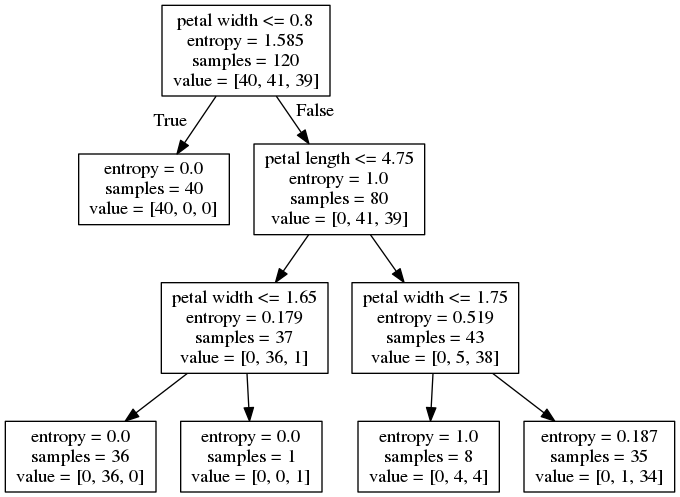

In [6]:
from IPython.display import Image
%matplotlib inline

Image(filename='./figures/tree.png', width=600) 

##### Trace back the splits

Looking at the decision tree figure that we created via GraphViz, we can now nicely trace back the splits that the decision tree determined from our training dataset.

We started with **120 samples at the root** and split it into **two child** nodes with 40 and 80 samples each using the **petal** with cut-off **≤ 0.8 cm**. 

After the first split, we can see that the **left child** node is already **pure** and only contains samples from the **Iris-Setosa class** (entropy = 0). 

The further splits on the **right** are then used to separate the samples from the **Iris-Versicolor** and **Iris-Virginica** classes.

**Note**

If you have scikit-learn 0.18 and pydotplus installed (e.g., you can install it via `pip install pydotplus`), you can also show the decision tree directly without creating a separate dot file as shown below. Also note that `sklearn 0.18` offers a few additional options to make the ``decision tree visually more appealing``.

In [13]:
import pydotplus

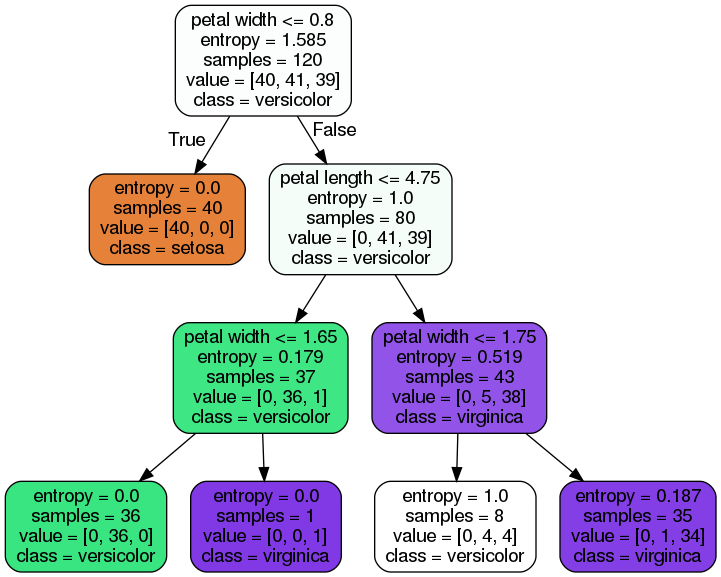

In [28]:
from IPython.display import Image
from IPython.display import display
  
try:

    import pydotplus

    dot_data = export_graphviz(
    tree, 
    out_file=None,
    # the parameters below are new in sklearn 0.18
    feature_names=['petal length', 'petal width'],  
    class_names=['setosa', 'versicolor', 'virginica'],  
    filled=True,
    rounded=True)

    graph = pydotplus.graph_from_dot_data(dot_data)  
    display(Image(graph.create_png()))

except ImportError:
    print('pydotplus is not installed.')

<br>
<br>

<div class="alert alert-success">

## Practice 
* Compare current DecisionTreeClassifier with new versions configured with max_depth=2,4,6

</dev>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


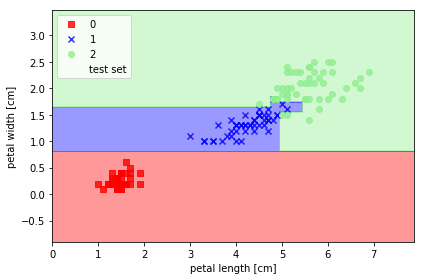

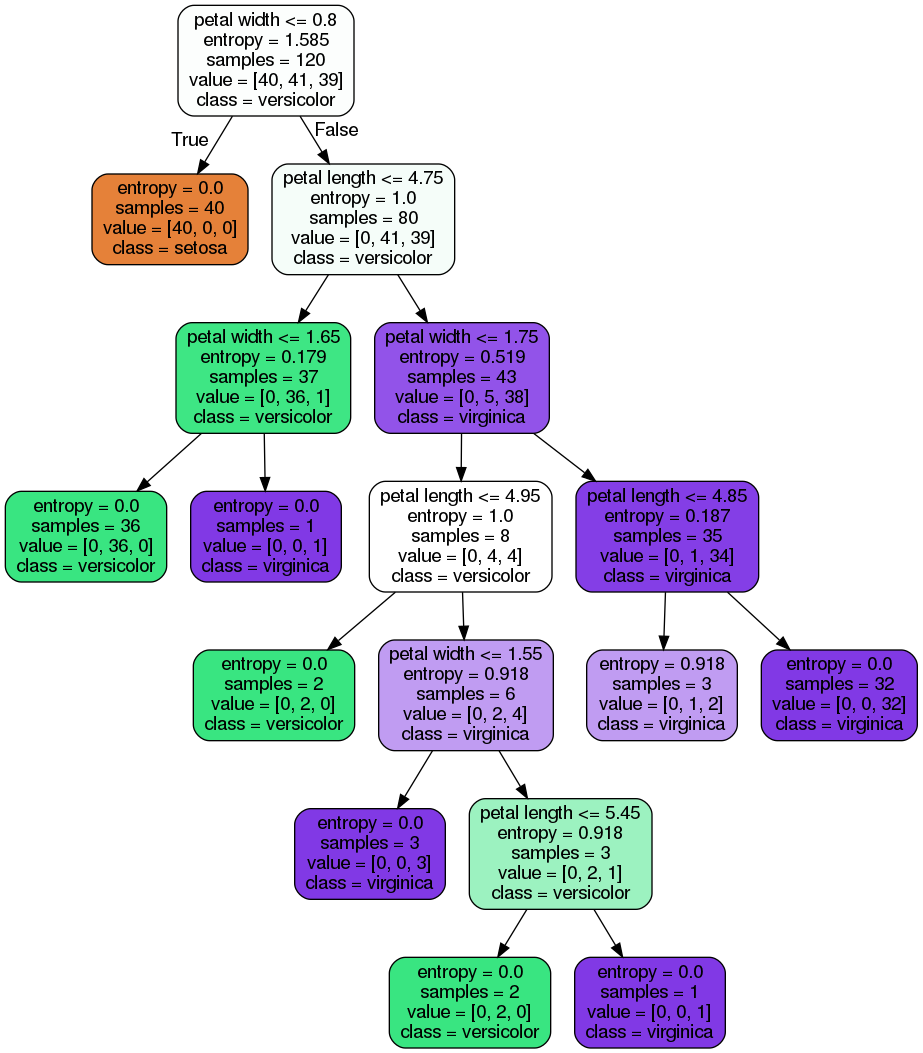

In [33]:
from IPython.display import Image
from IPython.display import display
  
from sklearn.tree import DecisionTreeClassifier
from plot_decision_regions import plot_decision_regions

tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/decision_tree_decision.png', dpi=300)
plt.show()

try:

    import pydotplus

    dot_data = export_graphviz(
    tree, 
    out_file=None,
    # the parameters below are new in sklearn 0.18
    feature_names=['petal length', 'petal width'],  
    class_names=['setosa', 'versicolor', 'virginica'],  
    filled=True,
    rounded=True)

    graph = pydotplus.graph_from_dot_data(dot_data)  
    display(Image(graph.create_png()))

except ImportError:
    print('pydotplus is not installed.')




### Advantages of Decision Tree
* **Highly Interpretable** & can be visualized
* **Minimal data preprocessing** - missing data handling, normalizing, one-hot-encoding not required
* Handle both **neumerical & categorical** values
* Supports multi-output 

### Limitations of Decision Tree
* **Overfitting** - height of tree kept growing with addition of more data
* ``Slight changes in data`` or order of data ``can change the tree``
* **Imbalanced classes** datasets creates biased tree so data needs balancing

##### The above two limitations are handled by ensemble methods

### Pruning
* A technique of machine learning which **reduces height** of the tree by chopping off parts of the tree that's not doing anything significant in prediction
* Two types of pruning - Prepruning & Postpruning
  - **Prepruning** : Don't allow tree to grow beyond this point
  - **Postpruning** : Allows tree to grow as much as possible, then prune the tree

<br>
<br>